In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
movies = pd.read_csv("Data/movies.dat", sep='::' , header=None, names =['MovieID','Title','Genres'] , engine='python')
ratings = pd.read_csv("Data/ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python')
users = pd.read_csv("Data/users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python' )

In [3]:
#Merge Dataset
tempDataset = pd.merge(movies,ratings, on='MovieID')
finalDF = pd.merge(tempDataset,users, on='UserID')
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


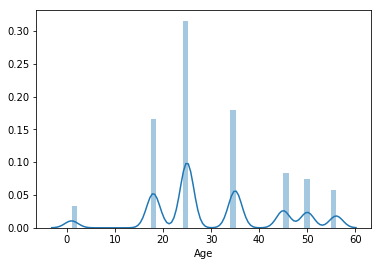

In [4]:
#•	Visualize user age distribution 
sns.distplot(users['Age'])

(array([ 222.,    0.,    0., 1103., 2096.,    0., 1193.,    0., 1046.,
         380.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

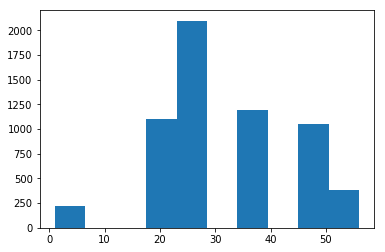

In [5]:
plt.hist(users['Age'])

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64


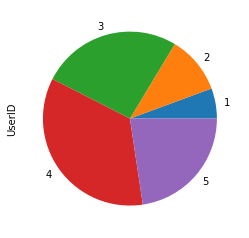

In [6]:
# •	Visualize overall rating by users
print(finalDF.groupby('Rating')['UserID'].count())
finalDF.groupby('Rating')['UserID'].count().plot(kind='pie')


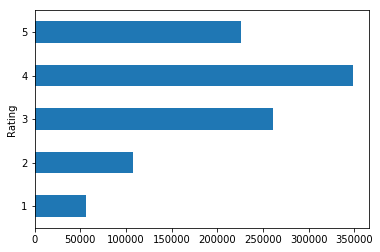

In [7]:
finalDF.groupby('Rating')['UserID'].count().plot(kind='barh')

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64


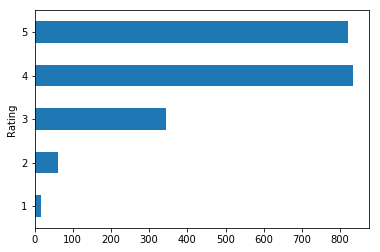

In [8]:
#•	Find and visualize the user rating of the movie “Toy Story (1995)”

print(finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count())
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind='barh')

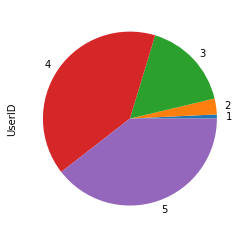

In [9]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind='pie')

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64


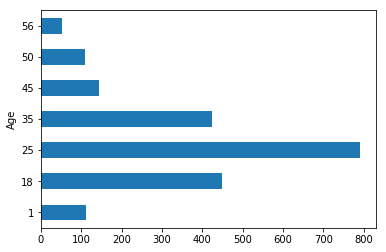

In [10]:
# •	Find and visualize the viewership of the movie “Toy Story (1995)” by age group
print(finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count())
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count().plot(kind='barh')

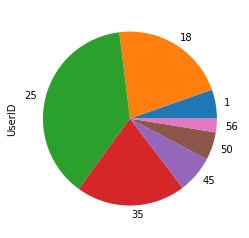

In [11]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count().plot(kind='pie')

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64


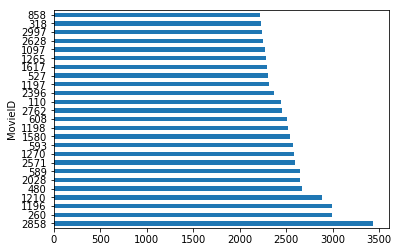

In [12]:
#•	Find and visualize the top 25 movies by viewership rating
print(finalDF.groupby('MovieID').Rating.count().nlargest(25))
finalDF.groupby('MovieID').Rating.count().nlargest(25).plot(kind='barh')

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


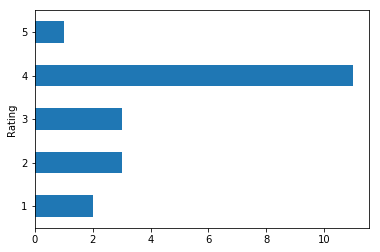

In [13]:
# •	Find the rating for a particular user of user id = 2696
print(finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count())
finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind='barh')

In [14]:
#ML Part
mlData = finalDF.head(500)
mlData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
MovieID       500 non-null int64
Title         500 non-null object
Genres        500 non-null object
UserID        500 non-null int64
Rating        500 non-null int64
Timestamp     500 non-null int64
Gender        500 non-null object
Age           500 non-null int64
Occupation    500 non-null int64
Zip-code      500 non-null object
dtypes: int64(6), object(4)
memory usage: 43.0+ KB


In [15]:
features = mlData.iloc[:,[0,7,8]].values
label = mlData.iloc[:,4].values

In [16]:
# Multiclass Classification 
# K-NN
mlData.Rating.unique()

array([5, 4, 3, 2, 1])

In [22]:
#Create Train Test Split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

for i in range(1,501):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state=i)
   
    model = KNeighborsClassifier(n_neighbors=17)
    model.fit(X_train,y_train)
    training_score = model.score(X_train,y_train)
    testing_score = model.score(X_test,y_test)
    
    #Only Generalized model will be outputted
    if testing_score > training_score:
        print("Training Score {} Testing Score {} for Random State {}".format(training_score,testing_score,i))

Training Score 0.405 Testing Score 0.42 for Random State 82
Training Score 0.4025 Testing Score 0.42 for Random State 104
Training Score 0.4225 Testing Score 0.45 for Random State 145
Training Score 0.41 Testing Score 0.43 for Random State 158
Training Score 0.415 Testing Score 0.42 for Random State 271
Training Score 0.395 Testing Score 0.41 for Random State 283
Training Score 0.405 Testing Score 0.41 for Random State 291
Training Score 0.3825 Testing Score 0.43 for Random State 460


In [51]:
#Create final model based on the discovered k value
#Identify which k value gives generalized

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state=145)

model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [52]:
#Check Generalization
model.score(X_train,y_train)

0.4225

In [53]:
#Check user input model prediction
model.score(X_test,y_test)

0.45